# EDA



Анализ данных из датасета train.csv

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/train.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

Данный датасет представляет собой данные об участах леса, содержащий следующую информацию:

0: Id - Номер участка</br>
1: Elevation - Высота над уровнем моря в метрах</br>
2: Aspect - Направление в градусах по азимуту</br>
3: Slope - Уклон в градусах</br>
4: Horizontal_Distance_To_Hydrology - Горизонтальное расстояние до ближайших объектов поверхностных вод</br>
5: Vertical_Distance_To_Hydrology - Расстояние до ближайших объектов с поверхностными водоемами</br>
6: Horizontal_Distance_To_Roadways - Расстояние от горы до ближайшей проезжей части</br>
7 - 9: Hillshade - Индекс затенения холмов в (9 утра, полдень, 3 часа дня) в день летнего солнцестояния</br>
10: Horizontal_Distance_To_Fire_Points - Расстояние от горы до ближайших точек возгорания</br>
11 - 14: Wilderness_Area - обозначение дикой местности (0 = отсутствие или 1 = наличие)</br>
15 - 54: Soil_Type - Обозначение типа почвы (0 = отсутствие или 1 = наличие)</br>
55: Cover_Type - Обозначение типа лесного покрова(7 типов, целые числа от 1 до 7)</br>

In [14]:
data_ = data

a = []
for i in range(len(data)):
    for x in range(1, 5):
        if data["Wilderness_Area" + str(x)][i]:
            a.append(x)

for x in range(1, 5):
    data_ = data_.drop("Wilderness_Area" + str(x), axis=1)

data_['Wilderness_Area'] = a

a.clear()
for i in range(len(data)):
    for x in range(1, 41):
        if data["Soil_Type" + str(x)][i]:
            a.append(x)

for x in range(1, 41):
    data_ = data_.drop("Soil_Type" + str(x), axis=1)

data_['Soil_Type'] = a
data_.iloc[:,:].describe().iloc[1:]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,4.000000,2.800397,19.171362
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,2.000066,1.119832,12.626960
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000,2.000000,10.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,4.000000,3.000000,17.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,6.000000,4.000000,30.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,7.000000,4.000000,40.000000


#todo описать что это такое и дать описание что 

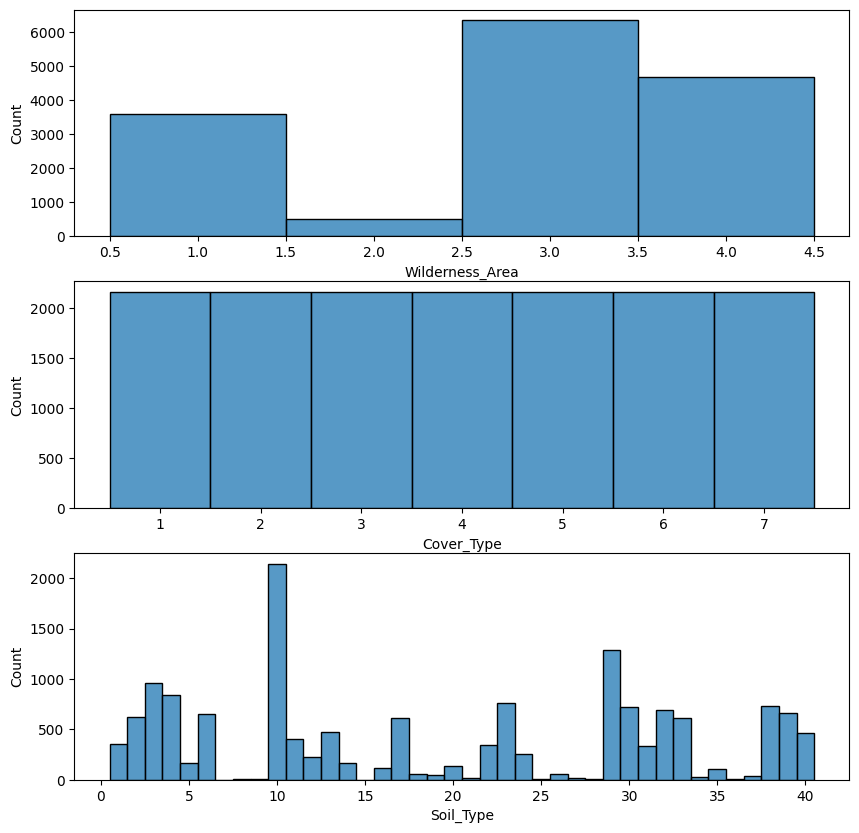

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.histplot(data=data_, x='Wilderness_Area',ax=axs[0],discrete=True)
sns.histplot(data=data_, x='Cover_Type',ax=axs[1], discrete=True)
sns.histplot(data=data_, x='Soil_Type',ax=axs[2],discrete=True)

plt.show()

#todo
Описать графики и сказать что то

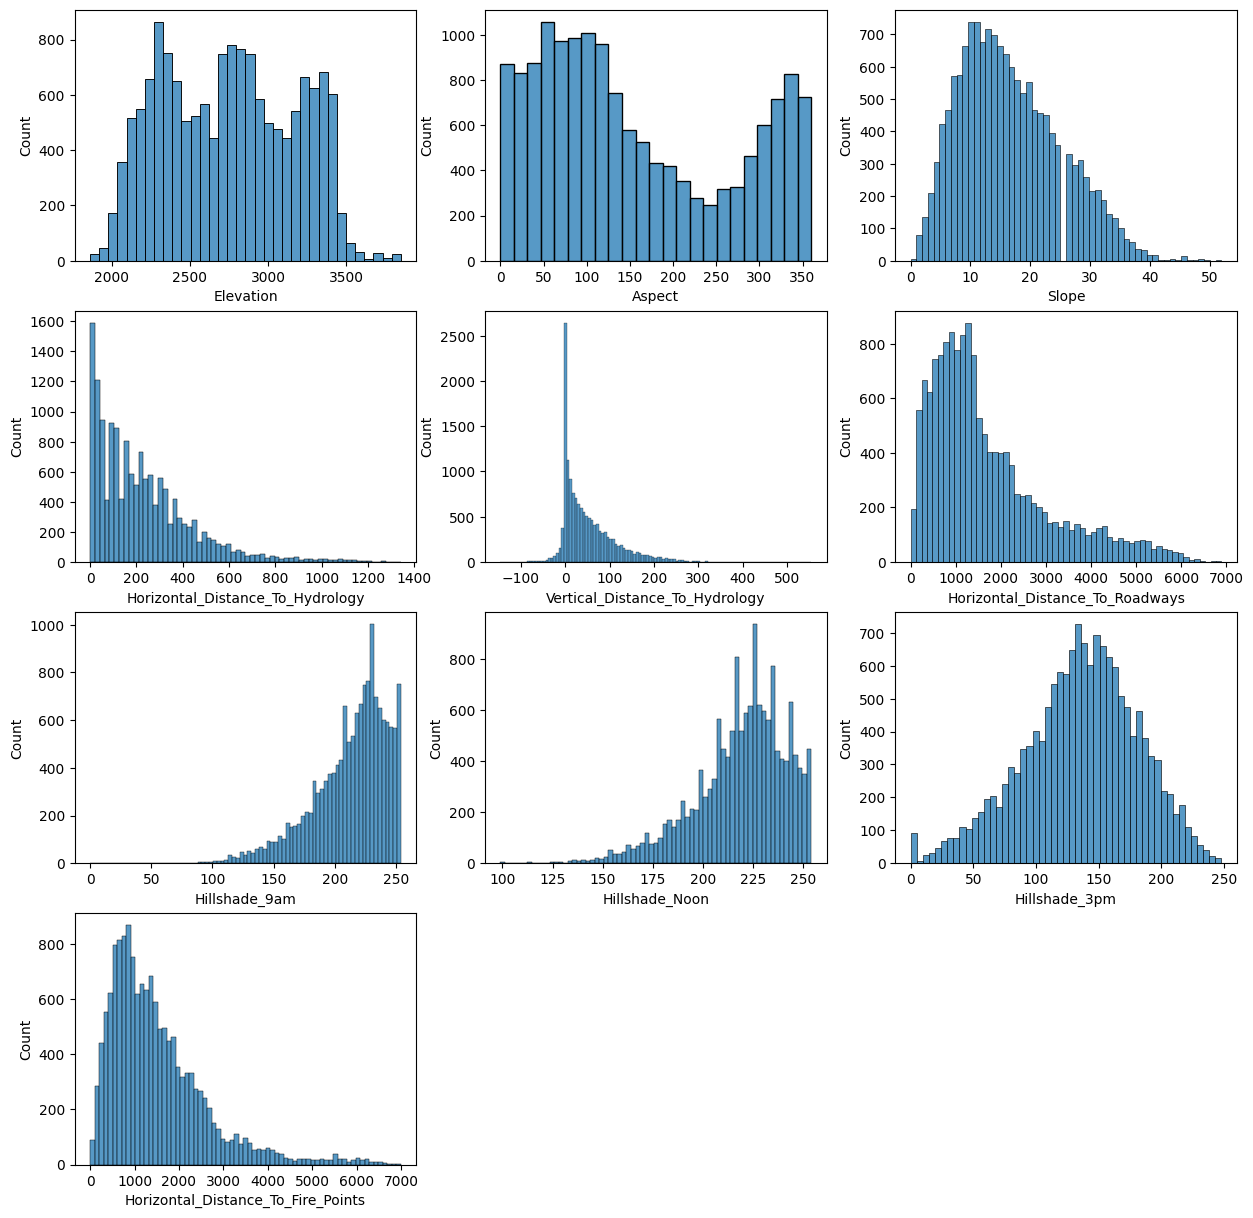

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(15,15))
sns.histplot(data=data_, x='Elevation',ax=axs[0][0])
sns.histplot(data=data_, x='Aspect',ax=axs[0][1])
sns.histplot(data=data_, x='Slope',ax=axs[0][2])
sns.histplot(data=data_, x='Horizontal_Distance_To_Hydrology',ax=axs[1][0])
sns.histplot(data=data_, x='Vertical_Distance_To_Hydrology',ax=axs[1][1])
sns.histplot(data=data_, x='Horizontal_Distance_To_Roadways',ax=axs[1][2])
sns.histplot(data=data_, x='Hillshade_9am',ax=axs[2][0])
sns.histplot(data=data_, x='Hillshade_Noon',ax=axs[2][1])
sns.histplot(data=data_, x='Hillshade_3pm',ax=axs[2][2])
sns.histplot(data=data_, x='Horizontal_Distance_To_Fire_Points',ax=axs[3][0])
axs[3][1].remove()
axs[3][2].remove()

#todo
Краткое описание что это

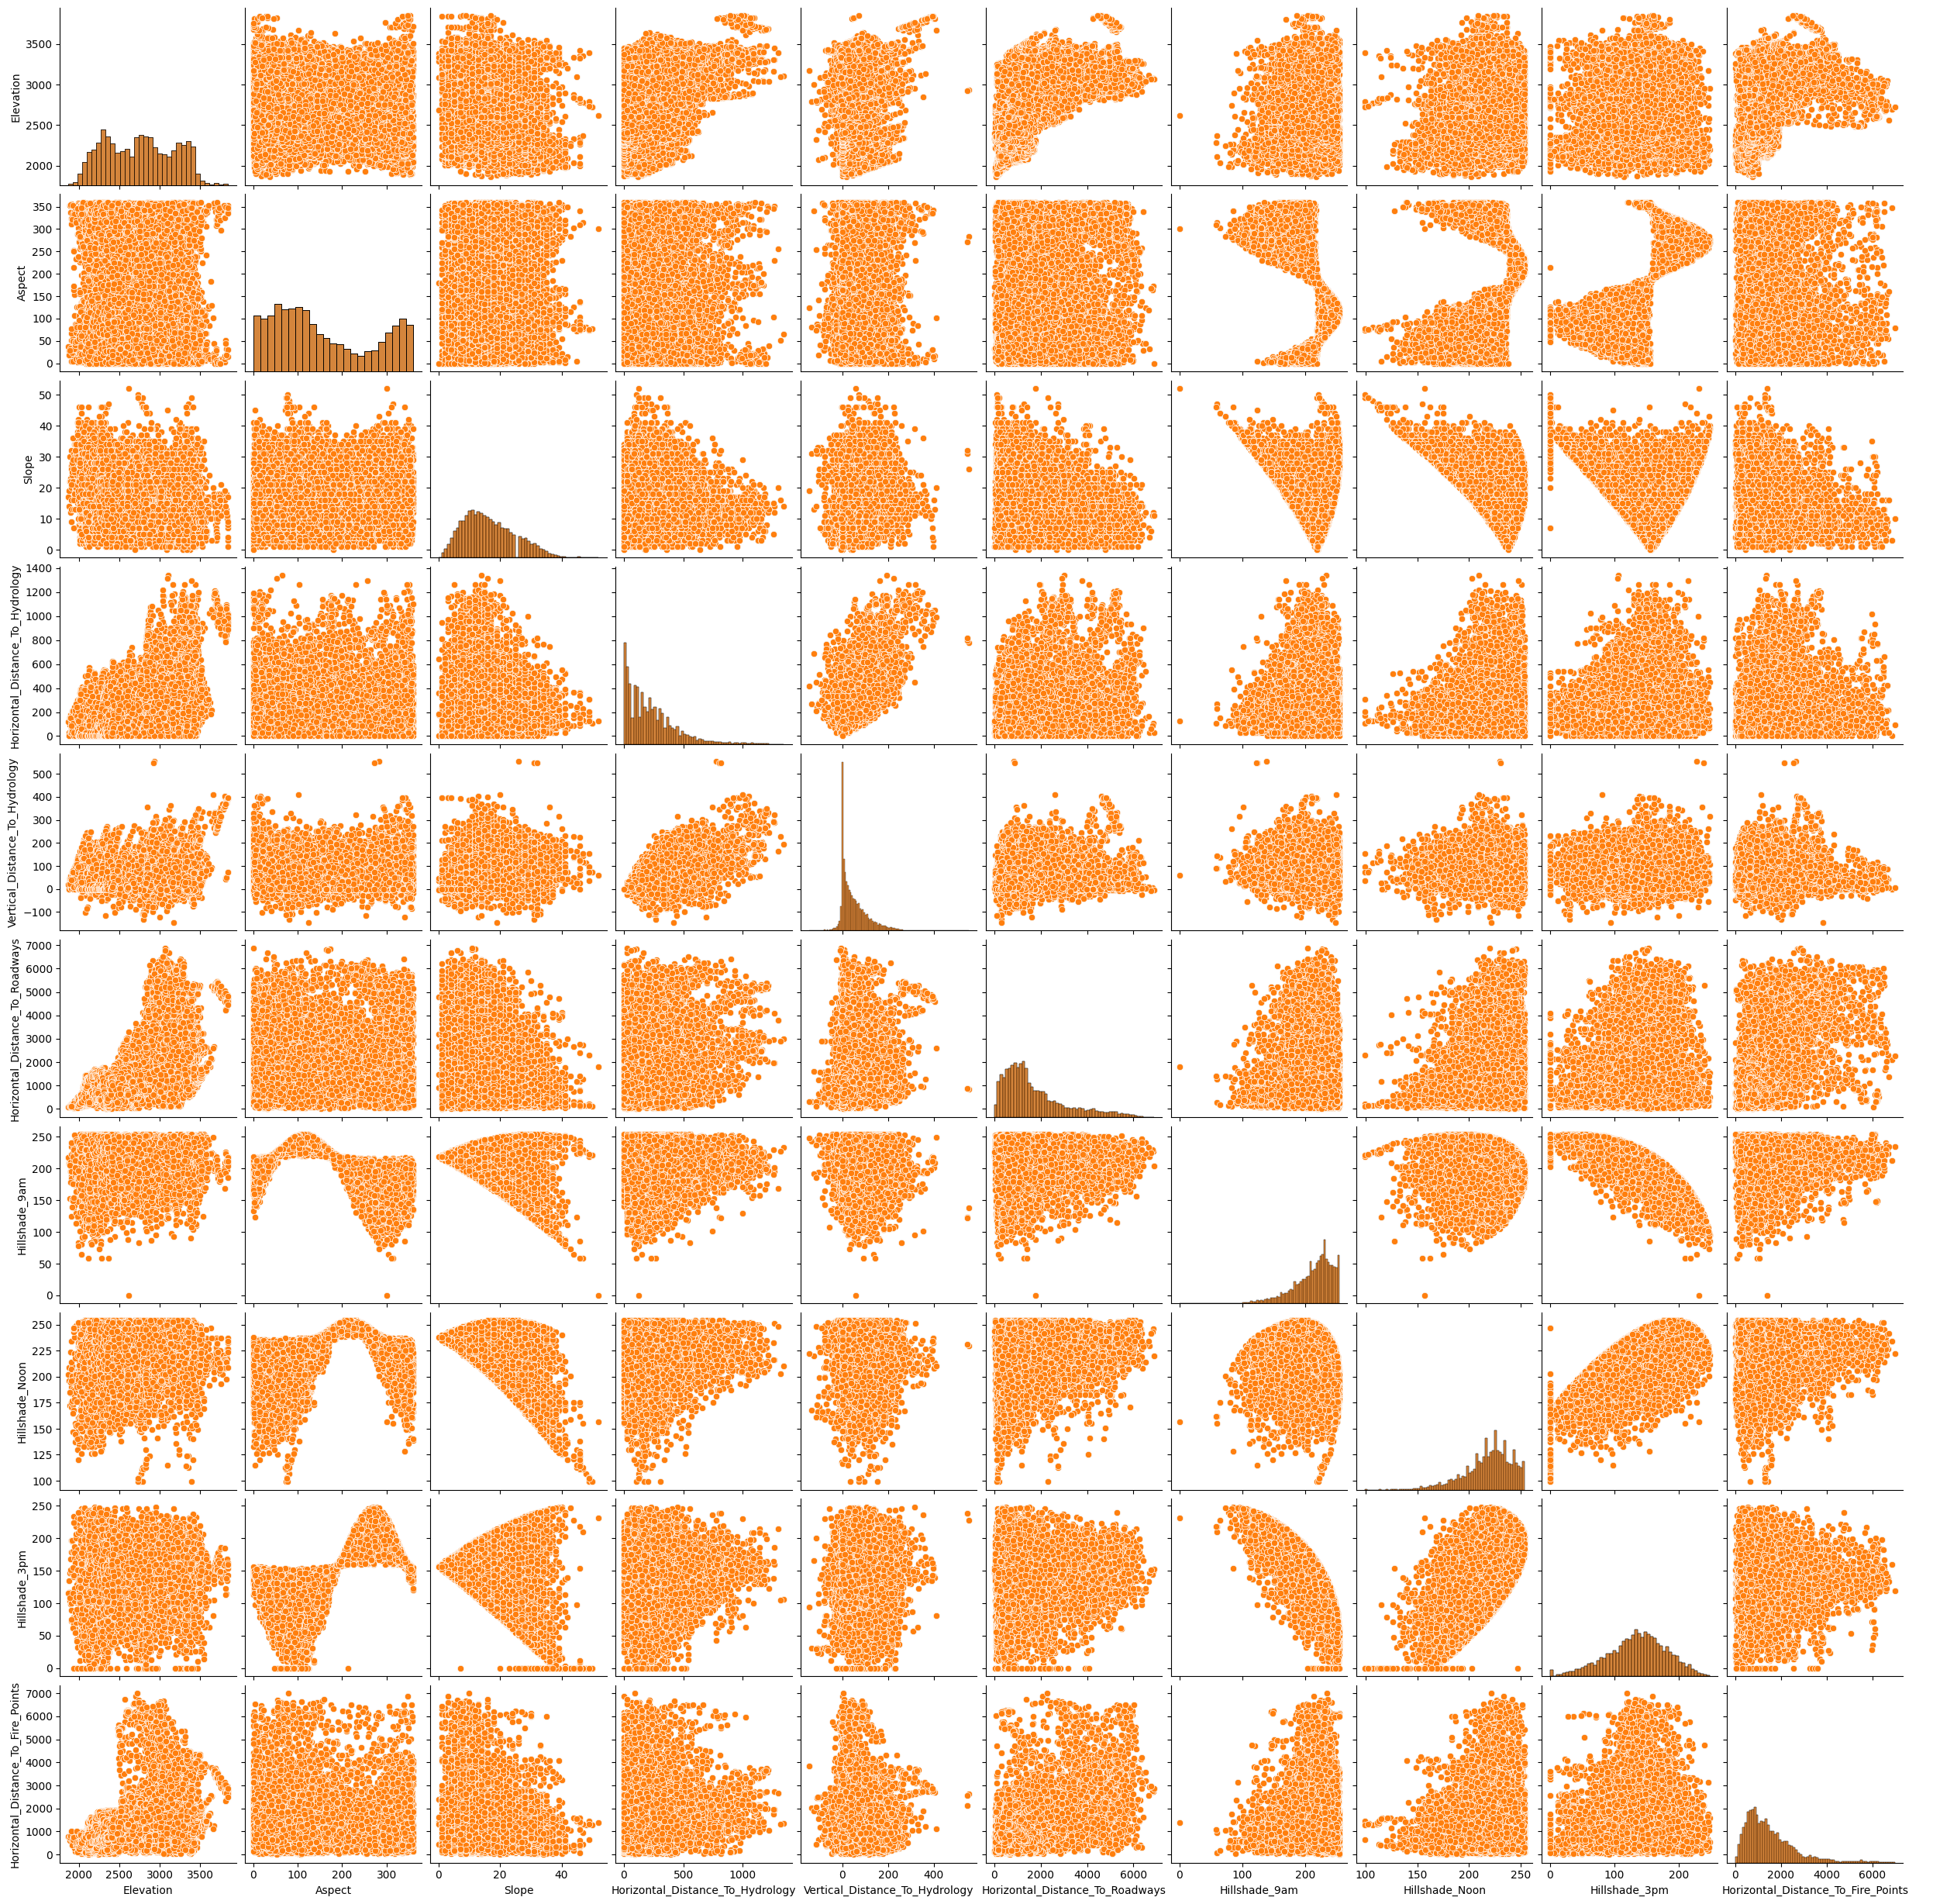

In [8]:
g = sns.pairplot(data_.iloc[:,1:-3])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()